# Chapter 3. Classification

## Mnist

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)

In [2]:
mnist['data'], mnist['target']

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [3]:
X, y = mnist['data'], mnist['target'].astype('int')

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

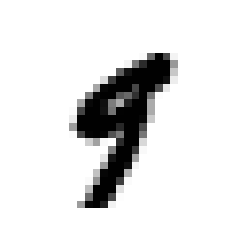

In [6]:
some_digit = X[36000]
plt.imshow(some_digit.reshape(28,28), cmap= matplotlib.cm.binary,
           interpolation='nearest')
plt.axis('off');

In [7]:
y[36000]

9

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

Classificator capable of distinguishing between 9 and not-9

In [9]:
y_train_9 = (y_train == 9)

In [10]:
y_test_9 = (y_test == 9)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [12]:
%%time
sgd_clf.fit(X_train, y_train_9)

CPU times: user 19.9 s, sys: 68.1 ms, total: 20 s
Wall time: 20 s


SGDClassifier(random_state=42)

## Performance Measures

### Measuring Accuracy Using Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring='accuracy')

array([0.9456 , 0.95195, 0.9509 ])

In [14]:
# "Dumb" classifier 
from sklearn.base import BaseEstimator

class Never9Classifier (BaseEstimator):
    def fit(self, X, y=None):
            pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [15]:
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv=3, scoring='accuracy')

array([0.8993 , 0.8999 , 0.90335])

When dealing with skewed datasets (some classes more frequent than others), accuracy is not a good performance measure.

### Confusion Matrix

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_9, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_9, y_train_pred)

array([[52715,  1336],
       [ 1695,  4254]])

### Precision and Recall

In [18]:
from sklearn.metrics import precision_score, recall_score

In [19]:
precision_score(y_train_9, y_train_pred)

0.7610017889087657

correct only 76% of the time 

In [20]:
recall_score(y_train_9, y_train_pred)

0.7150781643973777

only detects 71% of the 9s

In [21]:
from sklearn.metrics import f1_score

f1_score(y_train_9, y_train_pred)

0.737325591472398

In [22]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-4440.66086996])

In [23]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [24]:
threshold = 200000

In [25]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [27]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3,
                          method='decision_function')

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

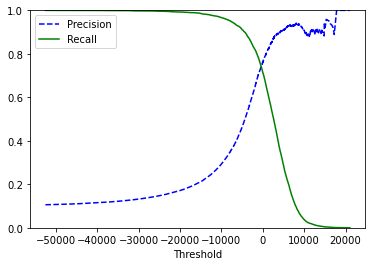

In [39]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [47]:
y_train_pred_90 = (y_scores > 70000)

In [51]:
np.unique(y_train_pred_90)

array([False])

In [48]:
precision_score(y_train_9, y_train_pred_90)

0.0

In [43]:
recall_score(y_train_9, y_train_pred_90)

0.0

### ROC Curve